In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
 train_labels = pd.read_csv("train_labels.csv", encoding='latin-1')

In [4]:
 train_values = pd.read_csv("train_values.csv", encoding='latin-1')

Grado de daño de las edificaciones con adobe

In [5]:
edificación_construida_con_adobe = train_values.loc[train_values['has_superstructure_adobe_mud']==1,'building_id']

In [6]:
grado_danio_edificación_construida_con_adobe = train_labels.merge(edificación_construida_con_adobe, how='inner')

In [7]:
grado_danio_edificación_construida_con_adobe = grado_danio_edificación_construida_con_adobe.groupby('damage_grade')\
    .agg('count').reset_index().rename(columns={'building_id':'cantidad_de_edificacion_de_adobe'})

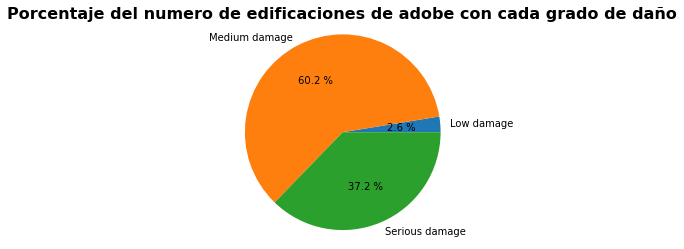

In [8]:
damage_grade=['Low damage','Medium damage','Serious damage']
plt.title('Porcentaje del numero de edificaciones de adobe con cada grado de daño', fontsize=16, fontweight='bold')
plt.pie(grado_danio_edificación_construida_con_adobe['cantidad_de_edificacion_de_adobe'], labels=damage_grade,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [9]:
grado_danio_edificación_construida_con_adobe['damage_grade'] = pd.Categorical(grado_danio_edificación_construida_con_adobe['damage_grade'])

In [10]:
grado_danio_edificación_construida_con_adobe = grado_danio_edificación_construida_con_adobe.set_index('damage_grade')
damage_grade = {1:'Low damage',2:'Medium damage', 3:'Serious damage'}
grado_danio_edificación_construida_con_adobe = grado_danio_edificación_construida_con_adobe.rename(index=damage_grade)

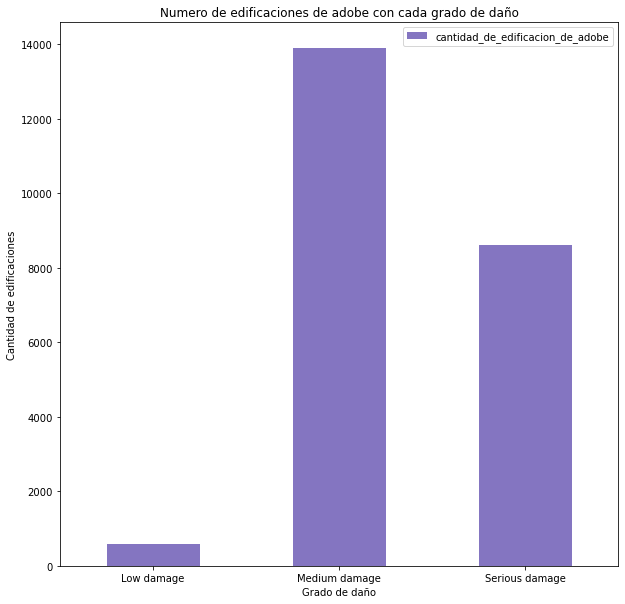

In [11]:
grado_danio_edificación_construida_con_adobe.plot(kind='bar',figsize=(10,10),rot=0,\
    title='Numero de edificaciones de adobe con cada grado de daño',color=(0.2, 0.1, 0.6, 0.6))
ax=plt.gca()
ax.set_xlabel('Grado de daño')
ax.set_ylabel('Cantidad de edificaciones');

Grado de daño de las escuelas

In [13]:
escuelas = train_values.loc[train_values['has_secondary_use_school']==1,'building_id']

In [14]:
grado_danio_escuelas = train_labels.merge(escuelas, how='inner')

In [15]:
grado_danio_escuelas = grado_danio_escuelas.groupby('damage_grade')\
    .agg('count').rename(columns={'building_id':'cantidad_de_escuelas'})

In [16]:
grado_danio_escuelas

,cantidad_de_escuelas
damage_grade,
1,30
2,47
3,17


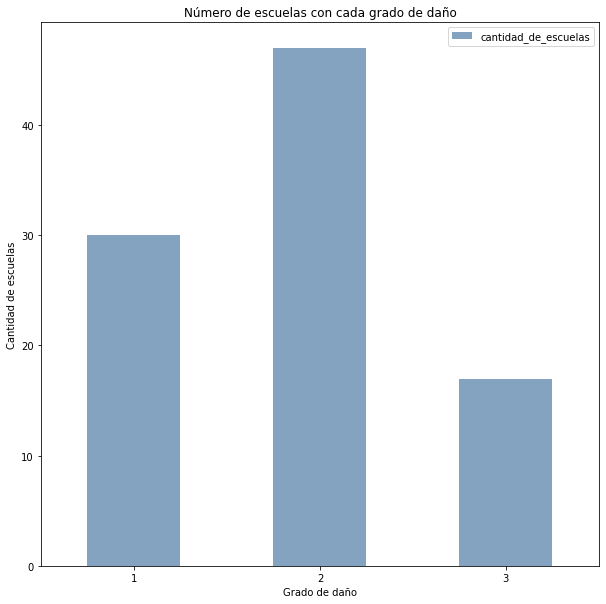

In [17]:
grado_danio_escuelas.plot(kind='bar',figsize=(10,10),rot=0,title='Número de escuelas con cada grado de daño',color=(0.2, 0.4, 0.6, 0.6))
ax=plt.gca()
ax.set_xlabel('Grado de daño')
ax.set_ylabel('Cantidad de escuelas');

Número de edificaciones con más de 900 años de antiguedad con cada grado de daño

In [20]:
anio_edificaciones_mas_antiguas = train_values['age'].max()

In [21]:
anio_edificaciones_mas_antiguas

995

In [22]:
edificaciones_mas_antiguas = train_values.loc[(train_values['age']==anio_edificaciones_mas_antiguas),'building_id']

In [23]:
edificaciones_mas_antiguas = train_labels.merge(edificaciones_mas_antiguas, how='inner')

In [24]:
grado_danio_edificaciones_mas_antiguas = edificaciones_mas_antiguas.groupby('damage_grade')\
    .agg('count').rename(columns={'building_id':'cantidad_de_edificaciones'})

In [25]:
grado_danio_edificaciones_mas_antiguas

,cantidad_de_edificaciones
damage_grade,
1,179
2,822
3,389


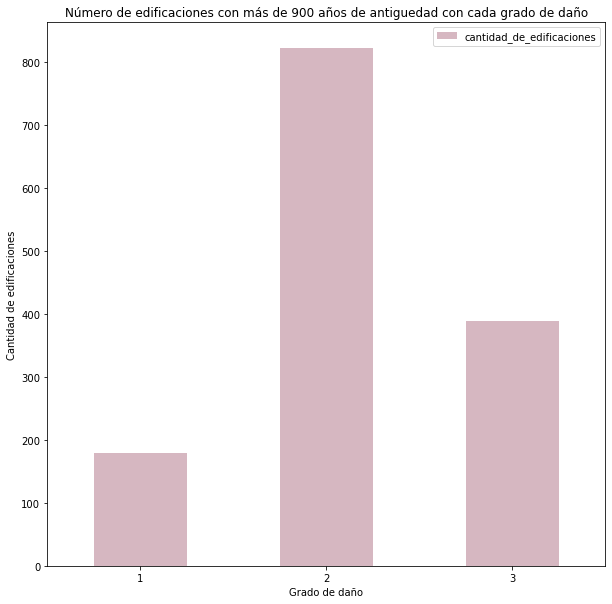

In [26]:
grado_danio_edificaciones_mas_antiguas.plot(kind='bar',figsize=(10,10),rot=0,\
    title='Número de edificaciones con más de 900 años de antiguedad con cada grado de daño',color=(0.6, 0.3, 0.4, 0.4))
ax=plt.gca()
ax.set_xlabel('Grado de daño')
ax.set_ylabel('Cantidad de edificaciones');

Grado de daño segun el numero de piso de una edificacion

In [27]:
numero_pisos = train_values[['building_id','count_floors_pre_eq']]

In [28]:
numero_pisos = train_labels.merge(numero_pisos, how='inner').\
 rename(columns={'count_floors_pre_eq':'Número de pisos'})

In [29]:
grado_danio_segun_numero_pisos = numero_pisos.groupby(['Número de pisos','damage_grade'])\
    .agg('count')

In [30]:
grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos.reset_index().\
 pivot(index='Número de pisos', columns='damage_grade',values='building_id').fillna(0)

In [31]:
grado_danio_segun_numero_pisos

damage_grade,1,2,3
Número de pisos,,,
1,8969.0,20798.0,10674.0
2,12593.0,93968.0,50062.0
3,2537.0,28479.0,24601.0
4,707.0,3374.0,1343.0
5,254.0,1481.0,511.0
6,53.0,133.0,23.0
7,10.0,25.0,4.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


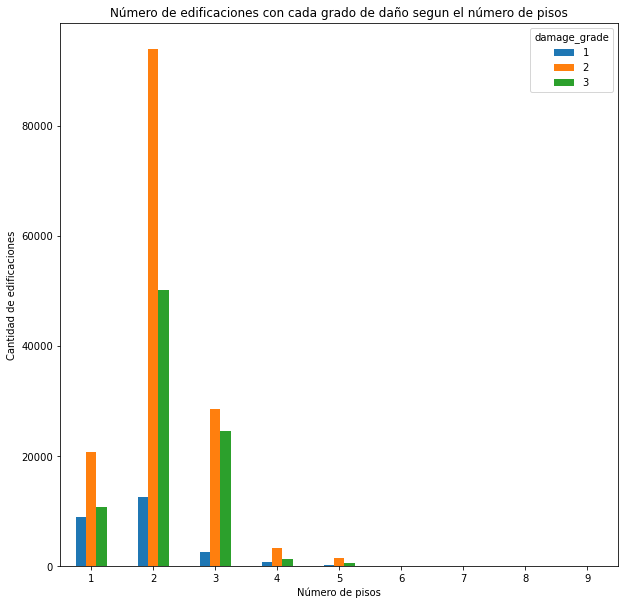

In [32]:
grado_danio_segun_numero_pisos.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones con cada grado de daño segun el número de pisos')
ax=plt.gca()
ax.set_xlabel('Número de pisos')
ax.set_ylabel('Cantidad de edificaciones');

Número de edificaciones con cada grado de daño segun el_geo_level_1

In [33]:
geo_level_1 = train_values[['building_id','geo_level_1_id']]

In [34]:
geo_level_1 = train_labels.merge(geo_level_1, how='inner')

In [35]:
geo_level_1 = geo_level_1.groupby(['geo_level_1_id','damage_grade'])\
    .agg('count')

In [36]:
geo_level_1 = geo_level_1.reset_index().\
 pivot(index='geo_level_1_id', columns='damage_grade',values='building_id').fillna(0)

In [37]:
geo_level_1

damage_grade,1,2,3
geo_level_1_id,,,
0,337.0,3075.0,599.0
1,411.0,1985.0,305.0
2,85.0,610.0,236.0
3,245.0,4550.0,2745.0
4,521.0,11164.0,2883.0
5,446.0,2014.0,230.0
6,2108.0,16222.0,6051.0
7,1033.0,11273.0,6688.0
8,654.0,8513.0,9913.0


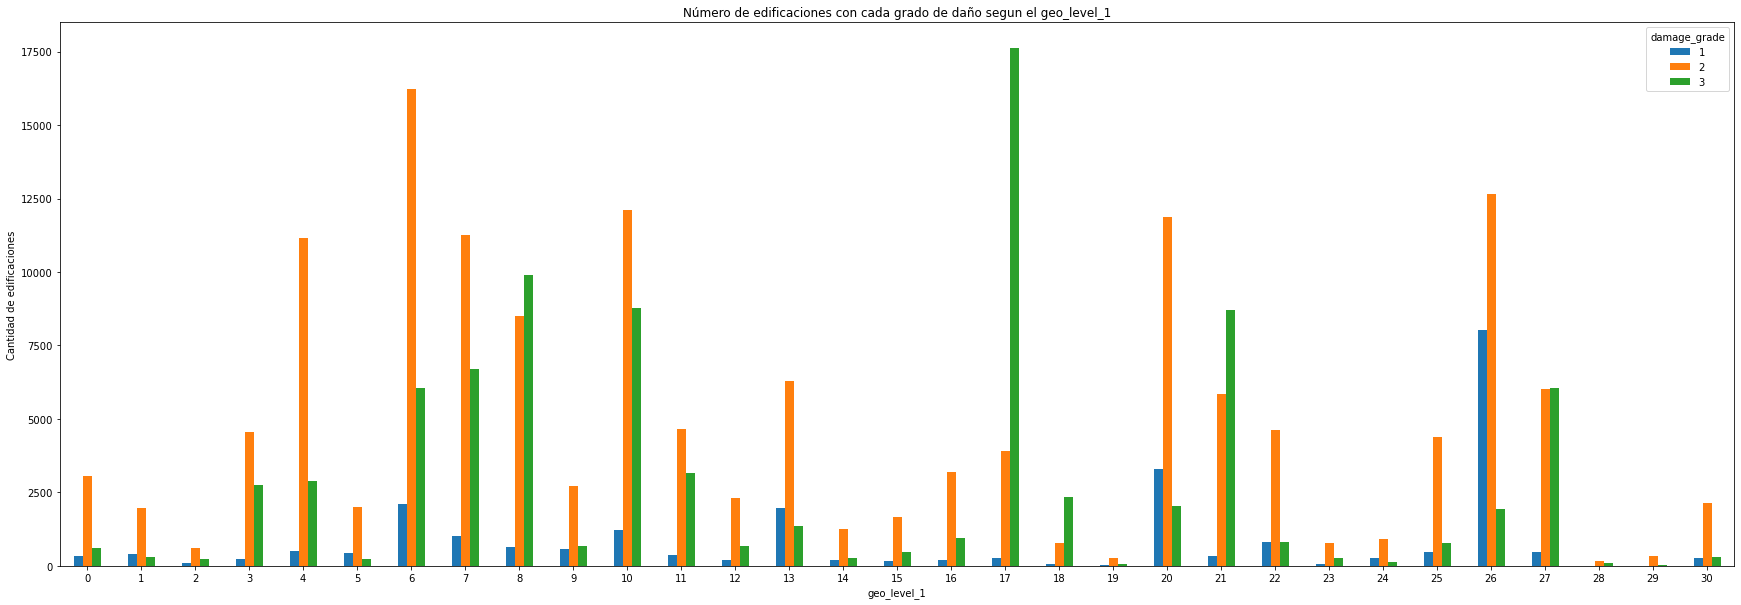

In [38]:
geo_level_1.plot(kind='bar',figsize=(30,10),\
                                    rot=0,title='Número de edificaciones con cada grado de daño segun el geo_level_1')
ax=plt.gca()
ax.set_xlabel('geo_level_1')
ax.set_ylabel('Cantidad de edificaciones');